<a href="https://colab.research.google.com/github/Senor-Anonymous/Sentiment-Analysis/blob/main/panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
'''Import videogamesales.csv and perform the following actions on it
Add a column of 'global_sales' showing the total sales of all the different regions to the data frame and sort (highest first) and print the DataFrame according to it.
Display a plot of the total number of copies sold of each genre globally.
Filter out only the games containing 'Grand Theft Auto' in their name and display the following as a DataFrame:
a. their name
b. the platform they were released on
c. the year they were released in
d. the sum of sales in only Europe and Japan
Display a pie chart of the total sales of all Grand Theft Auto games combined in North America, Europe, Japan, and other sales.
'''

In [ ]:
df = pd.read_csv('/content/videogamesales.csv')
df['global_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df_sorted = df.sort_values(by='global_sales', ascending=False)
print("DataFrame with 'global_sales' and sorted by it:")
print(df_sorted.head())

In [ ]:
genre_sales = df.groupby('Genre')['global_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_sales.plot.bar()
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
gta_games = df[df['Name'].str.contains('Grand Theft Auto', case=False, na=False)]
gta_filtered_df = gta_games[['Name', 'Platform', 'Year', 'EU_Sales', 'JP_Sales']].copy()
gta_filtered_df['EU_JP_Sales'] = gta_filtered_df['EU_Sales'] + gta_filtered_df['JP_Sales']

final_gta_df = gta_filtered_df[['Name', 'Platform', 'Year', 'EU_JP_Sales']]

print("Grand Theft Auto games with combined EU and JP Sales:")
print(final_gta_df.head())

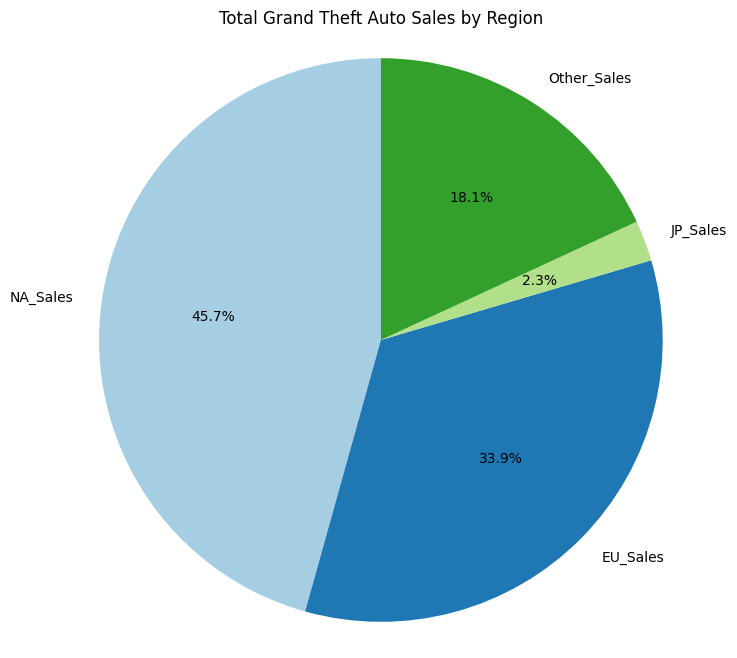

In [ ]:
regional_sales = gta_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8, 8))
plt.pie(regional_sales, labels=regional_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Grand Theft Auto Sales by Region')
plt.ylabel('') # Hide the default y-label if any
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()